<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_02_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.02. 여러가지 확률 분포
---
* 날짜: 2022-05-04
* 이름: 박태현

## 학습내용
    * 연속형 확률변수 -> 확률 밀도 함수 -> 연속형 확률 분포
      - 균등 분포*
      - 정규 분포
      - 지수 분포*
      - 감마 분포
      - 베타 분포*
      - 카이제곱 분포
    * 이산형 확률변수 -> 확률 질량 함수 -> 이산형 확률 분포
      - 베르누이 분포
      - 이항분포
      - 카테고리 확률 분포
      - 포아송 분포
      - 기하 분포
      - 음이항 분포
      - 초기하 분포


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import *

## 연속형 확률 분포
---



### **| 정규분포**

\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

```
sp.stats.norm(mu, std)
```

In [34]:
mu, std = 0, 1
norm = sp.stats.norm(mu, std)

* 확률 분포


In [35]:
norm.pdf([-1,0,1])

# X = [-1,0,1]
# P_X = norm.pdf(X) # 위와 같은 코드

array([0.24197072, 0.39894228, 0.24197072])

In [36]:
X = np.linspace(-5,5,10)
P_X = norm.pdf(X)
print(P_X)

[1.48671951e-06 2.07440309e-04 8.42153448e-03 9.94771388e-02
 3.41892294e-01 3.41892294e-01 9.94771388e-02 8.42153448e-03
 2.07440309e-04 1.48671951e-06]


* 누적 확률 분포


In [37]:
F_X = norm.cdf(X)
print(F_X)

[2.86651572e-07 5.03521029e-05 2.73660179e-03 4.77903523e-02
 2.89257361e-01 7.10742639e-01 9.52209648e-01 9.97263398e-01
 9.99949648e-01 9.99999713e-01]


* 표본 추출



(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
        -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
         2.75935511]),
 <a list of 10 Patch objects>)

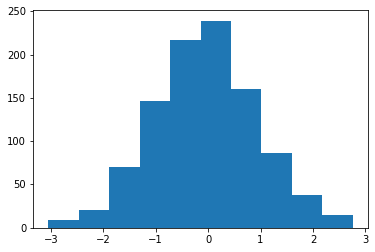

In [38]:
rvs = norm.rvs(1000, random_state = 0)
plt.hist(rvs)

#### **예제 01. 파라미터 변경-평균**

* 표준편차 `1`, 평균이 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

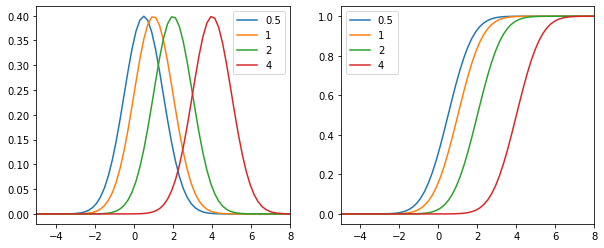

In [54]:
mus = [0.5, 1, 2, 4]
std = 1
X = np.linspace(-10, 10, 100)

fig, axis = plt.subplots(1, 2, figsize = (10,4))
axes = axis.flatten()

for mu in mus : 
  norm = sp.stats.norm(mu, std)
  P_X = norm.pdf(X) # 확률 밀도 함수
  F_X = norm.cdf(X) # 누적 밀도 함수

  axes[0].plot(X,P_X) # X에 대한 확률 값 그래프
  axes[1].plot(X,F_X) # X에 대한 누적 값 그래프
  axes[0].set_xlim(-5,8) # 범위 조절
  axes[1].set_xlim(-5,8)

axes[0].legend(mus) # 라벨링
axes[1].legend(mus)

#### **예제 02. 파라미터 변경-표준편차**

* 평균 `0`, 표준편차가 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

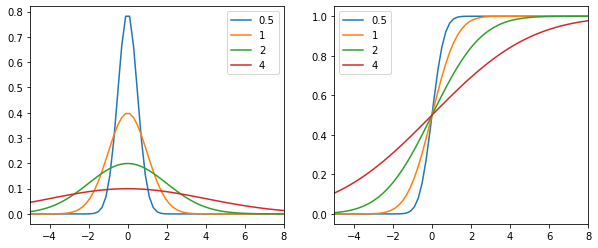

In [57]:
mu = 0
stds = [0.5, 1, 2, 4]
X = np.linspace(-10, 10, 100)

fig, axis = plt.subplots(1, 2, figsize = (10,4))
axes = axis.flatten()

for std in stds : 
  norm = sp.stats.norm(mu, std)
  P_X = norm.pdf(X) # 확률 밀도 함수
  F_X = norm.cdf(X) # 누적 밀도 함수

  axes[0].plot(X,P_X) # X에 대한 확률 값 그래프
  axes[1].plot(X,F_X) # X에 대한 누적 값 그래프
  axes[0].set_xlim(-5,8) # 범위 조절
  axes[1].set_xlim(-5,8)

axes[0].legend(stds) # 라벨링
axes[1].legend(stds)

#### **예제 03. 손의 길이**

성인 손의 길이의 평균은 15.2cm 이고 표준편차는 2.5cm를 따른다고 합니다. 1000명을 표본으로 뽑고 히스토 그램을 그리세요.

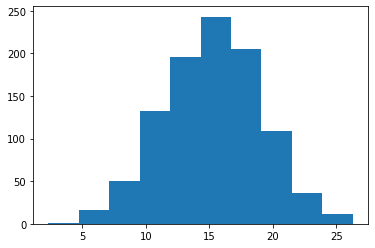

In [65]:
mu = 15.2
stds = 2.5
X = np.arange(1000)


norm = sp.stats.norm(mu, std)
_ = plt.hist(norm.rvs(1000))

### **| 카이제곱 분포**

\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\end{align}

```
sp.stats.chi2(df=df)
```

In [66]:
chi = sp.stats.chi2(df=1)

* 확률 분포


In [69]:
P_C = chi.pdf(1)

* 누적 확률 분포


In [70]:
C_C = chi.cdf(1)

* 표본 추출


In [71]:
norm.rvs(100)

array([16.99530941, 16.00797199, 14.65171176, 15.81981271, 19.70747026,
       19.97779218, 17.2002473 , 12.96994361, 13.85850271, 17.42308893,
        9.12561792, 17.45473124, 15.58454511, 20.56561921, 15.84304663,
       15.54184762, 11.49235954, 22.26525492, 11.72736597, 14.1478364 ,
       19.34826924, 14.95164967,  8.0158463 , 12.17375586, 11.6595137 ,
       15.4231786 , 14.38634977, 12.47922761, 17.69238527,  8.59710675,
       15.78852967, 16.08125479,  9.80941553, 19.70463164, 22.48808442,
       17.12318341, 22.37872763, 11.88130424, 14.41977567, 13.60760831,
       17.45656444, 10.60289274, 19.11722108, 22.95205183,  8.071533  ,
       15.35539796, 16.18259386, 12.58074455, 20.83940424, 10.64484703,
       14.94718746, 21.65766087, 12.02723959, 17.28702713, 14.24940294,
       10.28895114, 11.82571287, 13.53576474, 18.07874372, 12.92881147,
       14.10036442, 13.67174806, 14.44384287, 12.61071607, 11.3754908 ,
       17.31811923, 18.54652593, 16.57972408, 11.10125968, 18.98

#### **예제 01. 파라미터 변경-자유도**

* 자유도(df) 값이 각각 `1,2,3,4`인 카이제곱분포와 누적 확률 분포를 그리세요.

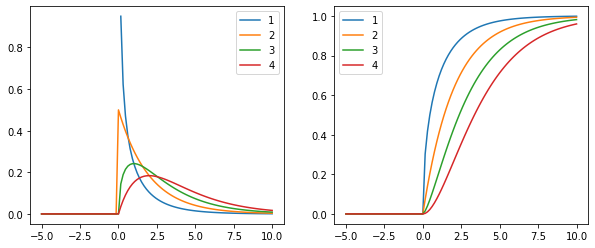

In [80]:
dfs = [1,2,3,4]

X = np.linspace(-5, 10, 100)

fig, axis = plt.subplots(1, 2, figsize = (10,4))
axes = axis.flatten()

for df in dfs : 
  chi = sp.stats.chi2(df=df)
  P_X = chi.pdf(X) # 확률 밀도 함수
  F_X = chi.cdf(X) # 누적 밀도 함수

  axes[0].plot(X,P_X) # X에 대한 확률 값 그래프
  axes[1].plot(X,F_X) # X에 대한 누적 값 그래프

axes[0].legend(dfs) # 라벨링
axes[1].legend(dfs)

### **| 감마분포**

\begin{align}
\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}
\end{align}

```
sp.stats.gamma(a=a, b=1)
```

In [84]:
gam = sp.stats.gamma(a= 1)

* 확률 분포

In [87]:
P_G = gam.pdf(1)
P_G

0.36787944117144233

* 누적 확률 분포


In [88]:
F_G = gam.cdf(1)
F_G

0.6321205588285577

* 표본 추출

In [89]:
C_G = gam.rvs(100)
C_G

array([3.13059536, 0.67868246, 0.58001929, 1.45675103, 0.93724558,
       0.4461644 , 1.25491145, 0.21615333, 1.21522552, 0.47797556,
       1.40443903, 0.57095048, 0.57630407, 0.03195248, 0.09635854,
       0.1646002 , 1.11265405, 1.07595526, 0.55437186, 1.82384196,
       0.54331349, 0.3586707 , 0.23613875, 1.4860044 , 0.04941188,
       0.41132302, 0.15853352, 0.79194462, 1.10460289, 0.85488947,
       1.259576  , 0.76070718, 0.41738522, 0.86003226, 2.77268233,
       0.30683607, 3.38931081, 0.06512871, 2.34543421, 1.63112899,
       0.51014228, 3.19562859, 0.36051592, 0.07036048, 0.60683287,
       1.00696939, 0.29942409, 0.90523464, 0.37691847, 4.32638834,
       0.58425071, 1.36675124, 1.31274071, 0.92918235, 0.52350642,
       0.72211636, 1.7747015 , 1.99577905, 0.07268779, 3.55391431,
       1.88472604, 2.18639347, 0.83243651, 1.85549467, 0.29371582,
       0.65275386, 0.03610066, 0.30964764, 0.66358962, 0.70881587,
       0.02668427, 0.1621968 , 0.14288924, 1.12809489, 1.27230

#### **예제 01. 파라미터 변경-a**

* a 값이 각각 `1,2,4,8`인 감마 분포와 누적 확률 분포를 그리세요.

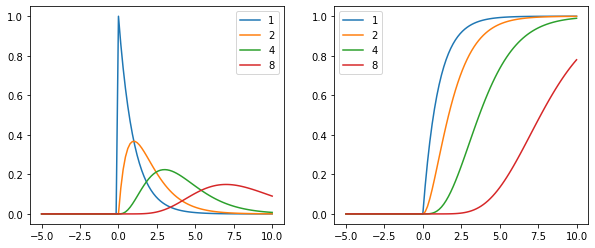

In [90]:
A = [1,2,4,8]

X = np.linspace(-5, 10, 100)

fig, axis = plt.subplots(1, 2, figsize = (10,4))
axes = axis.flatten()

for a_s in A : 
  gam = sp.stats.gamma(a= a_s)
  P_G = gam.pdf(X) # 확률 밀도 함수
  F_G = gam.cdf(X) # 누적 밀도 함수

  axes[0].plot(X,P_G) # X에 대한 확률 값 그래프
  
  axes[1].plot(X,F_G) # X에 대한 누적 값 그래프

axes[0].legend(A) # 라벨링
axes[1].legend(A)

###균등분포

In [91]:
test1 = sp.stats.uniform(1)
test1

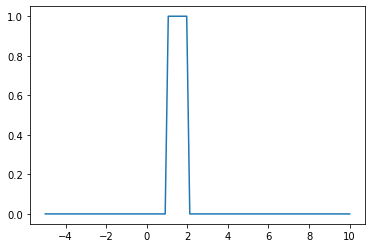

In [96]:
P_U = test1.pdf(X)

_ = plt.plot(X,P_U)

###지수분포

In [93]:
test2 = sp.stats.expon(1)
test2

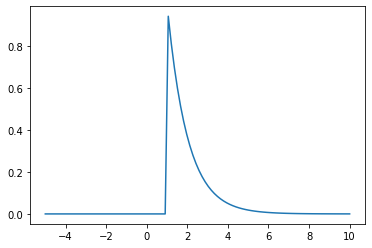

In [97]:
P_E = test2.pdf(X)

_ = plt.plot(X,P_E)

###베타분포

In [104]:
test3 = sp.stats.beta(a = 3, b = 2)

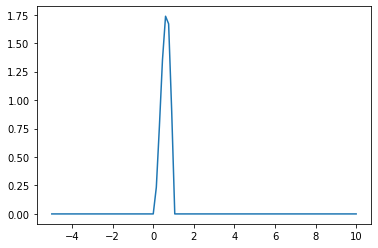

In [105]:
P_B = test3.pdf(X)

_ = plt.plot(X,P_B)

## 이산형 확률 분포
---

### |  **베르누이 분포**

\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}

* 기본사용

```
mu = 0.5
rv = sp.stats.bernoulli(mu)
```

* 확률 분포


* 누적 확률 분포


* 표본 추출

#### **예제 01. 동전 던지기**

동전을 던져서 앞면이 나온 확률



#### **예제 02. 주사위 굴리기**

주사위 던져서 6이 나온 확률


#### **예제 03. 같은 생일**

두 사람의 생일 월(月)이 같을 확률


#### **예제 04. 주머니 공**
주머니에 5개의 공이 들어있고 3개는 빨강, 2개는 하양이다. 공 2개를 뽑았을 때 색깔이 모두 다를 확률은?

### |  **이항분포**

\begin{align}
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
\end{align}


```
sp.stats.binom(N, mu)
```

* 확률 분포


* 누적 확률  분포

* 확률 변수 표본 추출


#### **예제 01. 동전 던지기**

* 동전을 1번 던졌을 때 앞면이 나온 횟수의 확률분포



* 동전을 10번 던졌을 때 앞면이 나온 횟수의 확률분포


#### **예제 02. 주사위 굴리기**

* 주사위를 1번 던져서 짝수가 나온 횟수의 분포

* 주사위를 6번 던져서 짝수가 나온 횟수의 분포

* 주사위를 20번 던져서 짝수가 나온 횟수의 분포

* 주사위를 1번 던져서 6이 나온 횟수의 분포

* 주사위를 6번 던져서 6이 나온 횟수의 분포

* 주사위를 20번 던져서 6이 나온 횟수의 분포

### **| 카테고리 확률분포**

\begin{split} 
\begin{align}
\text{Cat}(x;\mu) = 
\begin{cases}
\mu_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\mu_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\mu_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\mu_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
\end{align}
\end{split}


```
sp.stats.multinomial(1, mu)
```

* 확률 분포


* 표본 추출


#### **예제 01.공정하지 않은 주사위**

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때 확률분포를 그래세요.

#### **예제 02. 주머니 공**

주머니 안에 빨간색 5개, 노란색, 3개 초록색 2개 공이 들어 있을 때 공 한개를 뽑을 때 나오는 색깔의 확률 분포를 그리세요.

#### **예제 03. 선호 자리**

교실에 5개의 자리가 있고 학생이 x번째 자리에 앉을 확률이 $f(X=x)=\frac{1}{2^{(x+1)}}$ 로 주어졌습니다. 확률 분포를 그리세요.